## ECUACIONES NO LINEALES

METODO DE LA BISECCION

Tabla de Iteraciones del Método de Bisección:
          a         b         c      f(a)      f(b)      f(c)     Error
0  0.000000  2.000000  1.000000 -3.000000  5.389056 -0.281718  1.000000
1  1.000000  2.000000  1.500000 -0.281718  5.389056  1.981689  0.500000
2  1.000000  1.500000  1.250000 -0.281718  1.981689  0.740343  0.250000
3  1.000000  1.250000  1.125000 -0.281718  0.740343  0.205217  0.125000
4  1.000000  1.125000  1.062500 -0.281718  0.205217 -0.043904  0.062500
5  1.062500  1.125000  1.093750 -0.043904  0.205217  0.079199  0.031250
6  1.062500  1.093750  1.078125 -0.043904  0.079199  0.017288  0.015625
7  1.062500  1.078125  1.070312 -0.043904  0.017288 -0.013397  0.007812
8  1.070312  1.078125  1.074219 -0.013397  0.017288  0.001923  0.003906
9  1.070312  1.074219  1.072266 -0.013397  0.001923 -0.005742  0.001953


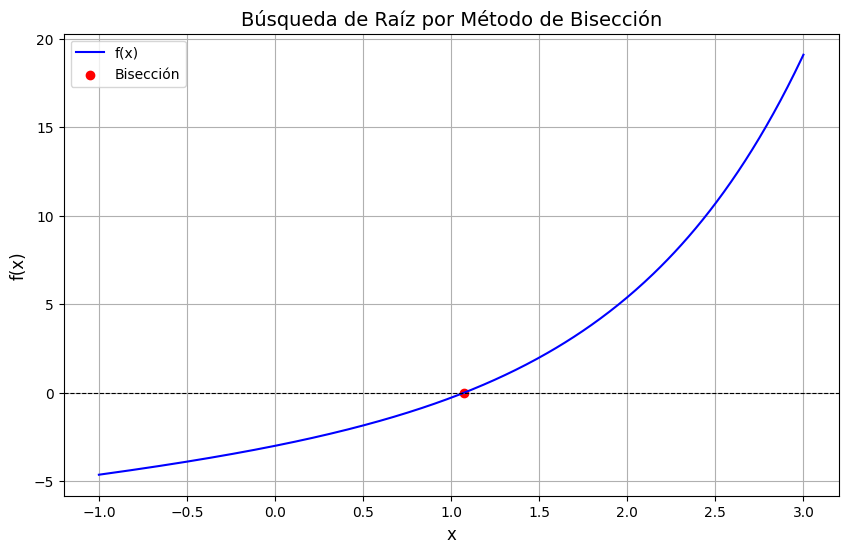

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, exp
import pandas as pd

# Definimos el símbolo y la función
x = symbols('x')  # Variable simbólica
func_expr = exp(x) - 4 + x  # Función f(x) = e^x - 4 + x

# Derivada automática
derivative_expr = diff(func_expr, x)  # Derivada simbólica
f = lambdify(x, func_expr, 'numpy')  # Convierte la función a evaluable
df = lambdify(x, derivative_expr, 'numpy')  # Convierte la derivada a evaluable

# Método de búsqueda de raíces: Bisección
def bisection_method(f, a, b, tol):
    iterations = []
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        error = (b - a) / 2
        iterations.append((a, b, c, f(a), f(b), f(c), error))
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iterations

# Soluciones por cada método
root_bisection, iterations_bisection = bisection_method(f, 0, 2, 0.001)

# Crear una tabla con las iteraciones
columns = ["a", "b", "c", "f(a)", "f(b)", "f(c)", "Error"]
iteration_df = pd.DataFrame(iterations_bisection, columns=columns)

# Mostrar tabla
print("Tabla de Iteraciones del Método de Bisección:")
print(iteration_df)

# Gráfica de la función y las raíces
x_vals = np.linspace(-1, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)", color="blue")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Mostrar raíz encontrada
plt.scatter(root_bisection, 0, color="red", label="Bisección")

# Formateo de ejes
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.title("Búsqueda de Raíz por Método de Bisección", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


METODO DE LA SECANTE

Raíz aproximada: 1.3652300311804615

Tabla de Iteraciones - Método de Secante:
   Iteración    x[i-1]      x[i]    x[i+1]   f(x[i-1])     f(x[i])     Tramo
0          0  1.000000  4.000000  1.121951   -5.000000  118.000000  2.878049
1          1  4.000000  1.121951  1.206068  118.000000   -3.552618  0.084117
2          2  1.121951  1.206068  1.387496   -3.552618   -2.427254  0.181428
3          3  1.206068  1.387496  1.363402   -2.427254    0.371713  0.024094
4          4  1.387496  1.363402  1.365210    0.371713   -0.030164  0.001808
5          5  1.363402  1.365210  1.365230   -0.030164   -0.000327  0.000020


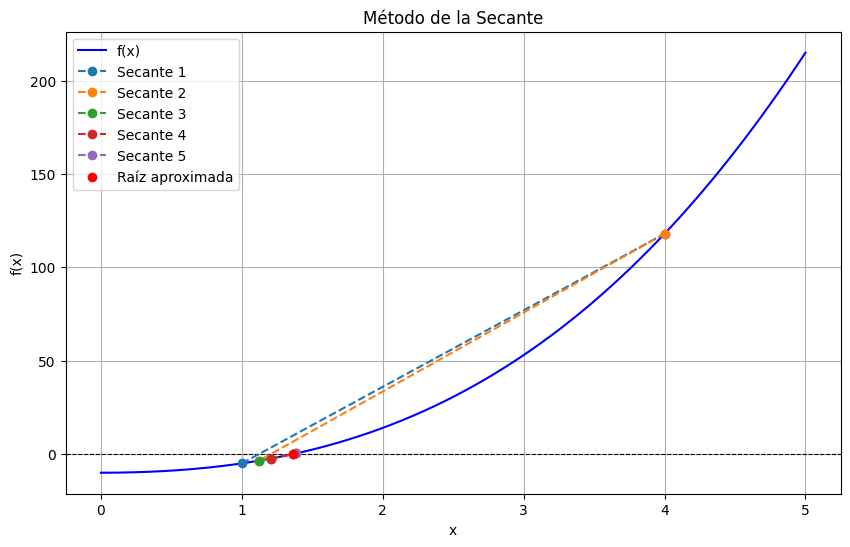

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def secante_raiz(fx, a, b, tolera, iteramax=20, precision=6):
    """
    Método de la secante para encontrar raíces.

    Parameters:
    - fx: función lambda a evaluar
    - a, b: puntos iniciales
    - tolera: tolerancia deseada
    - iteramax: número máximo de iteraciones
    - precision: precisión numérica para mostrar en la tabla

    Returns:
    - respuesta: raíz encontrada o NaN si no converge
    - tabla: DataFrame con las iteraciones
    """
    xi_1 = a
    xi = b
    itera = 0
    tramo = np.abs(xi - xi_1)

    # Almacenar resultados para la tabla
    resultados = []

    while not (tramo < tolera or itera > iteramax):
        fi_1 = fx(xi_1)
        fi = fx(xi)
        xi1 = xi - fi * (xi_1 - xi) / (fi_1 - fi)
        tramo = np.abs(xi1 - xi)

        resultados.append({
            "Iteración": itera,
            "x[i-1]": round(xi_1, precision),
            "x[i]": round(xi, precision),
            "x[i+1]": round(xi1, precision),
            "f(x[i-1])": round(fi_1, precision),
            "f(x[i])": round(fi, precision),
            "Tramo": round(tramo, precision),
        })

        xi_1 = xi
        xi = xi1
        itera += 1

    # Verificar convergencia
    if itera >= iteramax:
        xi = np.nan
        print("No converge: se alcanzó el máximo de iteraciones.")

    # Crear tabla
    tabla = pd.DataFrame(resultados)

    return xi, tabla

def graficar_secante(fx, a, b, tabla, tolera):
    """
    Graficar la función y las secantes.

    Parameters:
    - fx: función lambda
    - a, b: límites para la gráfica
    - tabla: DataFrame con las iteraciones
    - tolera: tolerancia para marcar la raíz
    """
    x = np.linspace(a - 1, b + 1, 500)
    y = fx(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

    # Graficar las secantes
    for i in range(len(tabla) - 1):
        x_secante = [tabla.loc[i, "x[i-1]"], tabla.loc[i, "x[i]"]]
        y_secante = [tabla.loc[i, "f(x[i-1])"], tabla.loc[i, "f(x[i])"]]
        plt.plot(x_secante, y_secante, linestyle='--', marker='o', label=f'Secante {i+1}')

    # Marcar la raíz final
    raiz = tabla.iloc[-1]["x[i+1]"]
    plt.plot(raiz, fx(raiz), 'ro', label='Raíz aproximada')

    plt.title('Método de la Secante')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# INGRESO
fx = lambda x: x**3 + 4*x**2 - 10

# Valores iniciales y parámetros
a = 1
b = 4
tolera = 0.001

# PROCEDIMIENTO
respuesta, tabla = secante_raiz(fx, a, b, tolera, iteramax=20, precision=6)

# SALIDA
print(f'Raíz aproximada: {respuesta}')
print("\nTabla de Iteraciones - Método de Secante:")
print(tabla)

# GRAFICAR RESULTADOS
graficar_secante(fx, a, b, tabla, tolera)





METODO FALSI

Raíz aproximada: 1.3652033036626001

Tabla de Iteraciones - Método de Secante:
   Iteración         a  b         c      f(a)  f(b)      f(c)     Tramo
0          0  1.000000  2  1.263158 -5.000000    14 -1.602274  0.736842
1          1  1.263158  2  1.338828 -1.602274    14 -0.430365  0.661172
2          2  1.338828  2  1.358546 -0.430365    14 -0.110009  0.641454
3          3  1.358546  2  1.363547 -0.110009    14 -0.027762  0.636453
4          4  1.363547  2  1.364807 -0.027762    14 -0.006983  0.635193
5          5  1.364807  2  1.365124 -0.006983    14 -0.001755  0.634876
6          6  1.365124  2  1.365203 -0.001755    14 -0.000441  0.634797


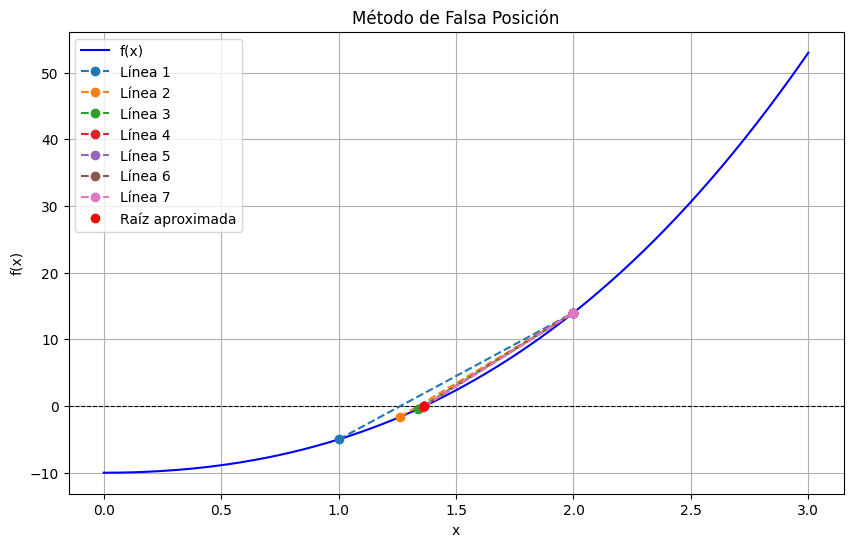

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def falsi_raiz(fx, a, b, tolera, iteramax=20, precision=6):
    """
    Método de falsa posición para encontrar raíces.

    Parameters:
    - fx: función lambda a evaluar
    - a, b: intervalo inicial [a, b]
    - tolera: tolerancia deseada
    - iteramax: número máximo de iteraciones
    - precision: precisión numérica para mostrar en la tabla

    Returns:
    - respuesta: raíz encontrada o NaN si no converge
    - tabla: DataFrame con las iteraciones
    """
    fa = fx(a)
    fb = fx(b)

    if fa * fb > 0:
        raise ValueError("La función no cambia de signo en el intervalo dado.")

    itera = 0
    tramo = np.abs(b - a)

    # Almacenar resultados para la tabla
    resultados = []

    while not (tramo < tolera or itera > iteramax):
        c = a - fa * (b - a) / (fb - fa)
        fc = fx(c)
        tramo = np.abs(c - b)

        resultados.append({
            "Iteración": itera,
            "a": round(a, precision),
            "b": round(b, precision),
            "c": round(c, precision),
            "f(a)": round(fa, precision),
            "f(b)": round(fb, precision),
            "f(c)": round(fc, precision),
            "Tramo": round(tramo, precision),
        })

        if np.abs(fc) < tolera:
            break

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        itera += 1

    # Verificar convergencia
    if itera >= iteramax:
        c = np.nan
        print("No converge: se alcanzó el máximo de iteraciones.")

    # Crear tabla
    tabla = pd.DataFrame(resultados)

    return c, tabla

def graficar_falsi(fx, a, b, tabla, tolera):
    """
    Graficar la función y las líneas del método de falsa posición.

    Parameters:
    - fx: función lambda
    - a, b: límites para la gráfica
    - tabla: DataFrame con las iteraciones
    - tolera: tolerancia para marcar la raíz
    """
    x = np.linspace(a - 1, b + 1, 500)
    y = fx(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

    # Graficar las líneas del método de falsa posición
    for i in range(len(tabla)):
        x_line = [tabla.loc[i, "a"], tabla.loc[i, "b"]]
        y_line = [tabla.loc[i, "f(a)"], tabla.loc[i, "f(b)"]]
        plt.plot(x_line, y_line, linestyle='--', marker='o', label=f'Línea {i+1}')

    # Marcar la raíz final
    raiz = tabla.iloc[-1]["c"]
    plt.plot(raiz, fx(raiz), 'ro', label='Raíz aproximada')

    plt.title('Método de Falsa Posición')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# INGRESO
fx = lambda x: x**3 + 4*x**2 - 10

# Valores iniciales y parámetros
a = 1
b = 2
tolera = 0.001

# PROCEDIMIENTO
respuesta, tabla = falsi_raiz(fx, a, b, tolera, iteramax=20, precision=6)


# SALIDA
print(f'Raíz aproximada: {respuesta}')
print("\nTabla de Iteraciones - Método de Secante:")
print(tabla)


# GRAFICAR RESULTADOS
graficar_falsi(fx, a, b, tabla, tolera)


METODO NEWTON RAPHSON

Raíz aproximada: 2.9826584700841674
   Iteración       x_i   x_(i+1)      f(x)     f'(x)    f''(x)     Tramo
0          0  2.000000  2.333333 -1.000000  3.000000 -6.000000  0.333333
1          1  2.333333  2.555556 -0.296296  1.333333 -4.000000  0.222222
2          2  2.555556  2.703704 -0.087791  0.592593 -2.666667  0.148148
3          3  2.703704  2.802469 -0.026012  0.263374 -1.777778  0.098765
4          4  2.802469  2.868313 -0.007707  0.117055 -1.185185  0.065844
5          5  2.868313  2.912209 -0.002284  0.052025 -0.790123  0.043896
6          6  2.912209  2.941472 -0.000677  0.023122 -0.526749  0.029264
7          7  2.941472  2.960982 -0.000200  0.010276 -0.351166  0.019509
8          8  2.960982  2.973988 -0.000059  0.004567 -0.234111  0.013006
9          9  2.973988  2.982658 -0.000018  0.002030 -0.156074  0.008671


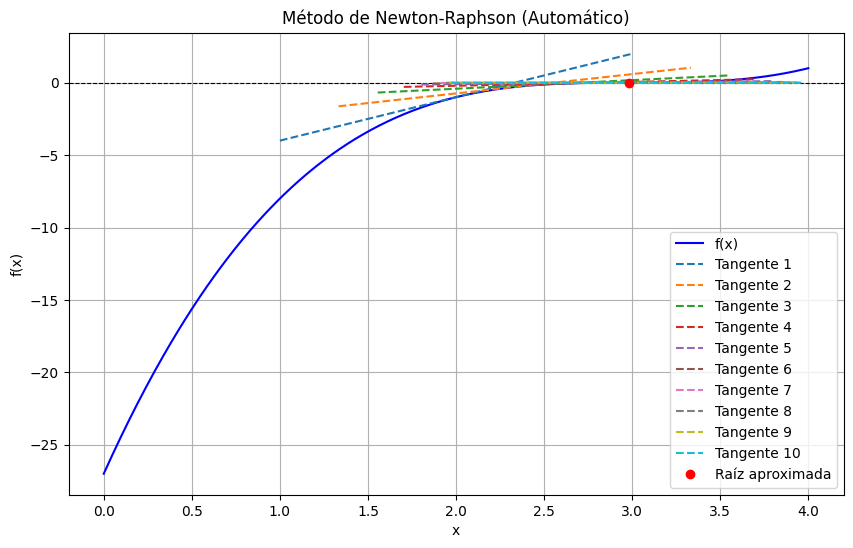

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify

def newton_raphson_raiz_auto(fx_expr, x0, tolera, iteramax=20, precision=6):
    """
    Método de Newton-Raphson para encontrar raíces con cálculo automático de derivadas.

    Parameters:
    - fx_expr: expresión simbólica de la función
    - x0: valor inicial
    - tolera: tolerancia deseada
    - iteramax: número máximo de iteraciones
    - precision: precisión numérica para mostrar en la tabla

    Returns:
    - respuesta: raíz encontrada o NaN si no converge
    - tabla: DataFrame con las iteraciones
    """
    # Definir variable simbólica
    x = symbols('x')

    # Derivar automáticamente la función
    fx = lambdify(x, fx_expr, 'numpy')
    dfx_expr = diff(fx_expr, x)
    dfx = lambdify(x, dfx_expr, 'numpy')

    # Derivar de segundo orden
    d2fx_expr = diff(dfx_expr, x)
    d2fx = lambdify(x, d2fx_expr, 'numpy')

    itera = 0
    tramo = float('inf')

    # Almacenar resultados para la tabla
    resultados = []

    while not (tramo < tolera or itera > iteramax):
        fx0 = fx(x0)
        dfx0 = dfx(x0)
        d2fx0 = d2fx(x0)
        x1 = x0 - fx0 / dfx0
        tramo = np.abs(x1 - x0)

        resultados.append({
            "Iteración": itera,
            "x_i": round(x0, precision),
            "x_(i+1)": round(x1, precision),
            "f(x)": round(fx0, precision),
            "f'(x)": round(dfx0, precision),
            "f''(x)": round(d2fx0, precision),
            "Tramo": round(tramo, precision),
        })

        x0 = x1
        itera += 1

    if itera >= iteramax:
        x1 = np.nan
        print("No converge: se alcanzó el máximo de iteraciones.")

    tabla = pd.DataFrame(resultados)
    return x1, tabla

def graficar_newton_auto(fx_expr, x0, tabla):
    """
    Graficar la función y las tangentes del método de Newton-Raphson.

    Parameters:
    - fx_expr: expresión simbólica de la función
    - x0: valor inicial
    - tabla: DataFrame con las iteraciones
    """
    # Definir variable simbólica
    x = symbols('x')

    # Convertir función simbólica a función numérica
    fx = lambdify(x, fx_expr, 'numpy')
    dfx_expr = diff(fx_expr, x)
    dfx = lambdify(x, dfx_expr, 'numpy')

    x_vals = np.linspace(x0 - 2, x0 + 2, 500)
    y_vals = fx(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='f(x)', color='blue')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

    # Graficar las tangentes
    for i in range(len(tabla)):
        x_tan = tabla.loc[i, "x_i"]
        y_tan = fx(x_tan)
        dfx_tan = dfx(x_tan)
        x_line = np.linspace(x_tan - 1, x_tan + 1, 100)
        y_line = dfx_tan * (x_line - x_tan) + y_tan
        plt.plot(x_line, y_line, linestyle='--', label=f'Tangente {i+1}')

    # Marcar la raíz final
    raiz = tabla.iloc[-1]["x_(i+1)"]
    plt.plot(raiz, fx(raiz), 'ro', label='Raíz aproximada')

    plt.title('Método de Newton-Raphson (Automático)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
from sympy import sympify
fx_expr = sympify("(x-3)**3")

# Valores iniciales y parámetros
x0 = 2
tolera = 0.01

# Procedimiento
respuesta, tabla = newton_raphson_raiz_auto(fx_expr, x0, tolera, iteramax=20, precision=6)

# Salida
print(f'Raíz aproximada: {respuesta}')
print(tabla)  # Imprime la tabla de iteraciones en la consola.

# Graficar resultados
graficar_newton_auto(fx_expr, x0, tabla)


METODO DE PUNTO FIJO

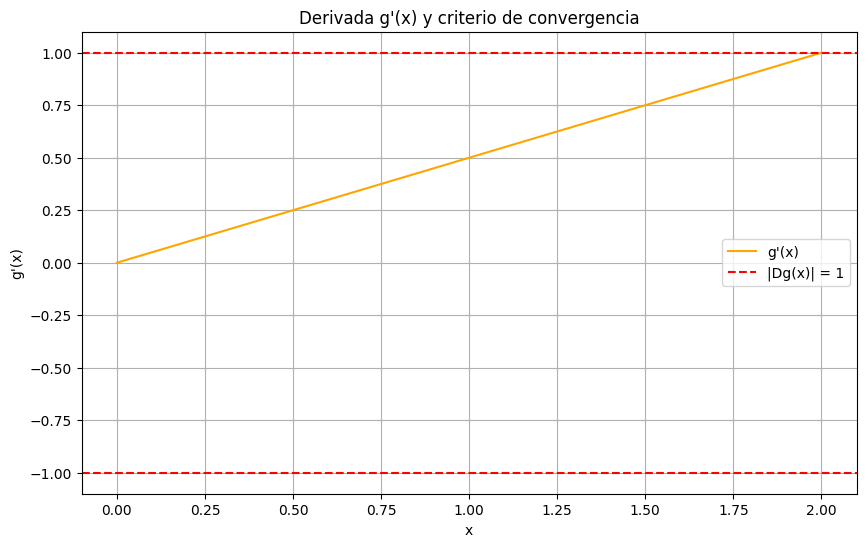

Punto fijo aproximado: 1.0008498420815337
   Iteración         x      g(x)     Tramo
0          0  1.500000  1.312500  0.187500
1          1  1.312500  1.180664  0.131836
2          2  1.180664  1.098492  0.082172
3          3  1.098492  1.051671  0.046821
4          4  1.051671  1.026503  0.025168
5          5  1.026503  1.013427  0.013076
6          6  1.013427  1.006759  0.006668
7          7  1.006759  1.003391  0.003368
8          8  1.003391  1.001698  0.001692
9          9  1.001698  1.000850  0.000848

Análisis de convergencia: {"Max |g'(x)|": 1.0, "Cumple criterio de convergencia (|g'(x)| < 1)": False}


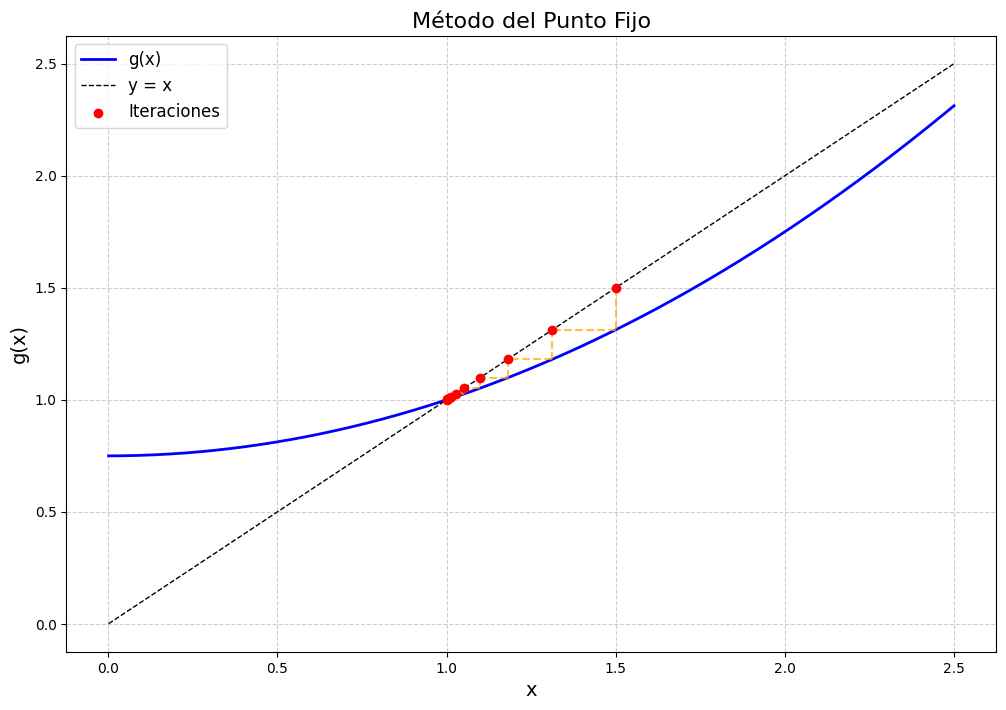

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify

def punto_fijo(gx, x0, tolera, iteramax=50, precision=6):
    """
    Método del Punto Fijo para encontrar el punto fijo de una función.

    Parameters:
    - gx: función lambda para g(x)
    - x0: valor inicial
    - tolera: tolerancia deseada
    - iteramax: número máximo de iteraciones
    - precision: precisión numérica para mostrar en la tabla

    Returns:
    - respuesta: punto fijo encontrado o NaN si no converge
    - tabla: DataFrame con las iteraciones
    """
    itera = 0
    tramo = float('inf')

    # Almacenar resultados para la tabla
    resultados = []

    while not (tramo < tolera or itera >= iteramax):
        x1 = gx(x0)
        tramo = abs(x1 - x0)

        resultados.append({
            "Iteración": itera,
            "x": round(x0, precision),
            "g(x)": round(x1, precision),
            "Tramo": round(tramo, precision)
        })

        x0 = x1
        itera += 1

    # Verificar convergencia
    if itera >= iteramax:
        x1 = np.nan
        print("No converge: se alcanzó el máximo de iteraciones.")

    # Crear tabla
    tabla = pd.DataFrame(resultados)

    return x1, tabla

def graficar_punto_fijo(gx, x0, iteramax=50):
    """
    Graficar el proceso de iteración del Método del Punto Fijo.

    Parameters:
    - gx: función lambda para g(x)
    - x0: valor inicial
    - iteramax: número máximo de iteraciones
    """
    x_vals = [x0]
    for _ in range(iteramax):
        x1 = gx(x0)
        x_vals.append(x1)
        x0 = x1

    # Gráfico
    x = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
    y = gx(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label='g(x)', color='blue', linewidth=2)
    plt.plot(x, x, label='y = x', color='black', linestyle='--', linewidth=1)
    plt.scatter(x_vals, x_vals, color='red', label='Iteraciones', zorder=5)
    for i in range(len(x_vals) - 1):
        plt.plot([x_vals[i], x_vals[i]], [x_vals[i], x_vals[i+1]], color='orange', linestyle='--', alpha=0.7)
        plt.plot([x_vals[i], x_vals[i+1]], [x_vals[i+1], x_vals[i+1]], color='orange', linestyle='--', alpha=0.7)

    plt.title('Método del Punto Fijo', fontsize=16)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('g(x)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def analizar_convergencia(gx_expr, intervalo):
    """
    Analiza la convergencia de g(x) en un intervalo específico basado en g'(x).

    Parameters:
    - gx_expr: expresión simbólica de la función g(x)
    - intervalo: tupla (a, b) para el análisis

    Returns:
    - dict con información del análisis de convergencia
    """
    x = symbols('x')
    g_prime_expr = diff(gx_expr, x)  # Derivada simbólica
    g_prime = lambdify(x, g_prime_expr, 'numpy')

    # Valores de x para análisis
    x_vals = np.linspace(intervalo[0], intervalo[1], 500)
    g_prime_vals = g_prime(x_vals)

    # Máximo y criterio de convergencia
    k_values = np.abs(g_prime_vals)
    convergence_criteria = k_values < 1
    k_max = np.max(k_values)

    # Gráfica de g'(x)
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, g_prime_vals, label="g'(x)", color='orange')
    plt.axhline(1, color='red', linestyle='--', label='|Dg(x)| = 1')
    plt.axhline(-1, color='red', linestyle='--')
    plt.title("Derivada g'(x) y criterio de convergencia")
    plt.xlabel('x')
    plt.ylabel("g'(x)")
    plt.legend()
    plt.grid()
    plt.show()

    return {
        "Max |g'(x)|": k_max,
        "Cumple criterio de convergencia (|g'(x)| < 1)": np.all(convergence_criteria)
    }

# INGRESO
x = symbols('x')
gx_expr = (x**2 + 3) / 4  # Ejemplo de g(x)
intervalo = (0, 2)

# Convertir g(x) a función evaluable
gx = lambdify(x, gx_expr, 'numpy')

x0 = 1.5
tolera = 0.001

# PROCEDIMIENTO
respuesta, tabla = punto_fijo(gx, x0, tolera, iteramax=50, precision=6)
convergencia = analizar_convergencia(gx_expr, intervalo)

# SALIDA
print(f'Punto fijo aproximado: {respuesta}')
print(tabla)
print("\nAnálisis de convergencia:", convergencia)

graficar_punto_fijo(gx, x0, iteramax=10)


SISTEMAS DE ECUACUACIONES NO LINEALES

Solución del sistema no lineal: [1.82287566 0.82287566]
   Iteración        x1        x2     Tramo
0          0  1.000000  1.000000  1.000000
1          1  2.000000  1.000000  0.235702
2          2  1.833333  0.833333  0.014731
3          3  1.822917  0.822917  0.000058
Punto fijo aproximado: 1.0008498420815337
   Iteración         x      g(x)     Tramo
0          0  1.500000  1.312500  0.187500
1          1  1.312500  1.180664  0.131836
2          2  1.180664  1.098492  0.082172
3          3  1.098492  1.051671  0.046821
4          4  1.051671  1.026503  0.025168
5          5  1.026503  1.013427  0.013076
6          6  1.013427  1.006759  0.006668
7          7  1.006759  1.003391  0.003368
8          8  1.003391  1.001698  0.001692
9          9  1.001698  1.000850  0.000848


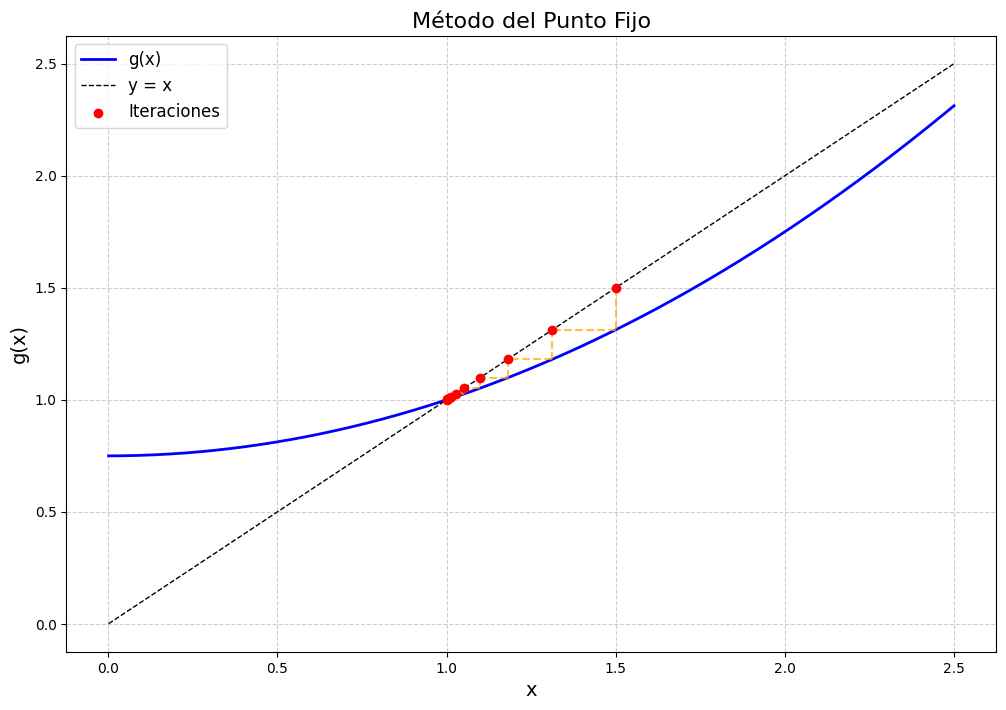

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def newton_raphson_sistema(funcs, jacobian, x0, tolera, iteramax=50, precision=6):
    """
    Método de Newton-Raphson para resolver sistemas de ecuaciones no lineales.

    Parameters:
    - funcs: lista de funciones lambda [f1, f2, ...] para el sistema
    - jacobian: función lambda que retorna el Jacobiano
    - x0: lista de valores iniciales [x0_1, x0_2, ...]
    - tolera: tolerancia deseada
    - iteramax: número máximo de iteraciones
    - precision: precisión numérica para mostrar en la tabla

    Returns:
    - solucion: solución aproximada del sistema
    - tabla: DataFrame con las iteraciones
    """
    x = np.array(x0, dtype=float)
    itera = 0
    tramo = float('inf')

    resultados = []

    while not (tramo < tolera or itera >= iteramax):
        F = np.array([f(*x) for f in funcs])
        J = np.array(jacobian(*x))

        # Resolver sistema lineal J dx = -F
        dx = np.linalg.solve(J, -F)
        x_new = x + dx
        tramo = np.linalg.norm(dx, ord=2)

        resultados.append({
            "Iteración": itera,
            **{f"x{i+1}": round(xi, precision) for i, xi in enumerate(x)},
            "Tramo": round(tramo, precision)
        })

        x = x_new
        itera += 1

    if itera >= iteramax:
        print("No converge: se alcanzó el máximo de iteraciones.")

    tabla = pd.DataFrame(resultados)
    return x, tabla

# Ejemplo de sistema no lineal
f1 = lambda x, y: x**2 + y**2 - 4
f2 = lambda x, y: x - y - 1

jacobian = lambda x, y: [
    [2*x, 2*y],
    [1, -1]
]

x0_sistema = [1.0, 1.0]  # Valores iniciales

# Resolver sistema
solucion, tabla = newton_raphson_sistema([f1, f2], jacobian, x0_sistema, tolera=0.001, iteramax=50, precision=6)

# Salida
print(f"Solución del sistema no lineal: {solucion}")
print(tabla)

# INGRESO PARA PUNTO FIJO
def punto_fijo(gx, x0, tolera, iteramax=50, precision=6):
    """
    Método del Punto Fijo para encontrar el punto fijo de una función.

    Parameters:
    - gx: función lambda para g(x)
    - x0: valor inicial
    - tolera: tolerancia deseada
    - iteramax: número máximo de iteraciones
    - precision: precisión numérica para mostrar en la tabla

    Returns:
    - respuesta: punto fijo encontrado o NaN si no converge
    - tabla: DataFrame con las iteraciones
    """
    itera = 0
    tramo = float('inf')

    # Almacenar resultados para la tabla
    resultados = []

    while not (tramo < tolera or itera >= iteramax):
        x1 = gx(x0)
        tramo = abs(x1 - x0)

        resultados.append({
            "Iteración": itera,
            "x": round(x0, precision),
            "g(x)": round(x1, precision),
            "Tramo": round(tramo, precision)
        })

        x0 = x1
        itera += 1

    # Verificar convergencia
    if itera >= iteramax:
        x1 = np.nan
        print("No converge: se alcanzó el máximo de iteraciones.")

    # Crear tabla
    tabla = pd.DataFrame(resultados)

    return x1, tabla

def graficar_punto_fijo(gx, x0, iteramax=50):
    """
    Graficar el proceso de iteración del Método del Punto Fijo.

    Parameters:
    - gx: función lambda para g(x)
    - x0: valor inicial
    - iteramax: número máximo de iteraciones
    """
    x_vals = [x0]
    for _ in range(iteramax):
        x1 = gx(x0)
        x_vals.append(x1)
        x0 = x1

    # Gráfico
    x = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
    y = gx(x)

    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label='g(x)', color='blue', linewidth=2)
    plt.plot(x, x, label='y = x', color='black', linestyle='--', linewidth=1)
    plt.scatter(x_vals, x_vals, color='red', label='Iteraciones', zorder=5)
    for i in range(len(x_vals) - 1):
        plt.plot([x_vals[i], x_vals[i]], [x_vals[i], x_vals[i+1]], color='orange', linestyle='--', alpha=0.7)
        plt.plot([x_vals[i], x_vals[i+1]], [x_vals[i+1], x_vals[i+1]], color='orange', linestyle='--', alpha=0.7)

    plt.title('Método del Punto Fijo', fontsize=16)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('g(x)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

gx = lambda x: (x**2 + 3) / 4  # Ejemplo de g(x)
x0 = 1.5
tolera = 0.001

respuesta, tabla_punto_fijo = punto_fijo(gx, x0, tolera, iteramax=50, precision=6)
print(f'Punto fijo aproximado: {respuesta}')
print(tabla_punto_fijo)

graficar_punto_fijo(gx, x0, iteramax=10)
